In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# LOAD THE DATE
CUST_DEMO = pd.read_excel(r'C:\Users\Admin\Documents\CustomerDemographics.xlsx')
CUST_BEHAVE=pd.read_excel(r'C:\Users\Admin\Documents\CustomerBehaviorData.xlsx')
CUST_CON= pd.read_excel(r'C:\Users\Admin\Documents\CreditConsumptionData.xlsx')

In [3]:
CUST_DEMO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [4]:
CUST_BEHAVE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [5]:
CUST_CON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [6]:
CUST_DEMO.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0


In [7]:
CUST_BEHAVE.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [8]:
CUST_CON.head()

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [9]:
# EXPLORATORY DATA ANALYSIS (EDA)
# HANDLE MISSING VALUES 
CUST_DEMO.isnull().sum()


ID                              0
account_type                    1
gender                          1
age                             0
Income                          1
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     1
NetBanking_Flag                 0
Avg_days_between_transaction    3
dtype: int64

In [10]:
# since the missing value percentage are less than 7 % we can drop the missing values
CUST_DEMO.dropna()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [11]:
CUST_BEHAVE.isna().sum()

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              1
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              1
cc_count_apr             1
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     1
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             2
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          1
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [12]:
CUST_BEHAVE.dropna()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [13]:
CUST_DEMO.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
count,20000.000000,20000.000000,20000.000000,20000.000000,19999.000000,20000.000000,19997.000000
mean,9999.500000,47.672300,15.217250,5.496050,598.959348,0.718000,11.044757
std,5773.647028,30.359771,20.481455,2.870452,220.105230,0.449985,5.480552
min,0.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000
25%,4999.750000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000
50%,9999.500000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000
75%,14999.250000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000
max,19999.000000,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000


In [14]:
CUST_BEHAVE.describe()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
count,20000.000000,20000.000000,20000.000000,1.999900e+04,20000.000000,20000.000000,19999.000000,19999.000000,20000.000000,20000.000000,...,2.000000e+04,20000.00000,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000,2.000000e+04,1.999900e+04
mean,9999.500000,17856.990922,8130.453414,1.618836e+04,7702.427191,12135.806021,7109.708341,41.611631,33.569100,41.470200,...,8.293707e+04,11.91900,40.974850,5.820799e+04,7.812280e+04,7.881693e+04,19.905450,44.529100,5.284985e+04,1.539887e+04
std,5773.647028,25158.878234,14572.188829,2.651068e+04,17892.731800,18790.984789,13313.935609,97.835475,50.316925,46.825658,...,1.714761e+05,16.85576,40.561202,2.085914e+05,2.448983e+05,1.569872e+05,27.055323,35.080453,1.343175e+05,1.202541e+05
min,0.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,...,1.061000e+01,0.00000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00
25%,4999.750000,4377.000000,1624.650000,3.635910e+03,1634.260000,2999.075000,1361.100000,5.000000,8.000000,10.000000,...,2.521075e+04,2.00000,11.000000,2.020225e+04,2.576311e+04,2.492008e+04,4.000000,12.000000,1.896450e+04,1.545940e+03
50%,9999.500000,10214.642500,3964.750000,8.635230e+03,3791.720000,6656.800000,3326.000000,10.000000,23.000000,35.000000,...,4.813718e+04,4.00000,23.000000,3.149650e+04,4.572505e+04,4.618300e+04,7.000000,37.000000,3.025000e+04,3.934660e+03
75%,14999.250000,21189.000000,9339.020000,1.865531e+04,8263.590000,14195.727500,7458.820000,44.000000,43.000000,61.000000,...,9.447656e+04,11.00000,69.000000,5.642100e+04,8.529653e+04,8.602000e+04,21.000000,73.000000,5.344900e+04,9.376390e+03
max,19999.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,653.000000,...,1.060175e+07,71.00000,171.000000,1.000000e+07,2.642915e+07,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06


In [15]:
CUST_CON.describe()

,ID,cc_cons
count,20000.000000,15000.000000
mean,9999.500000,55157.729867
std,5773.647028,97670.972252
min,0.000000,0.000000
25%,4999.750000,6768.000000
50%,9999.500000,13364.000000
75%,14999.250000,20105.750000
max,19999.000000,408382.000000


In [16]:
# IDENTIFY DATA TYPES
CUST_DEMO.dtypes

ID                                int64
account_type                     object
gender                           object
age                               int64
Income                           object
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                     float64
NetBanking_Flag                   int64
Avg_days_between_transaction    float64
dtype: object

In [17]:
# MERGE THE TABLE CUST_DEMO, CUST_BEHAVE AND CUST_CON
DATA1 = pd.merge(CUST_DEMO,CUST_BEHAVE)
DATA = pd.merge(DATA1,CUST_CON)

In [18]:
DATA.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [19]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
 10  cc_cons_apr                   20000 non-null  float64
 11  dc_cons_apr                   20000 non-null  float64
 12  cc_cons_may                   19999 non-null  float64
 13  d

In [20]:
# SEPRATING THE DATA WHICH HAS NULL VALUE TO BE PREDICTED
DATA_PREDICT = DATA[DATA['cc_cons'].isnull()]
DATA_ACTUAL =  DATA[DATA['cc_cons'].notnull()]

In [21]:
DATA_PREDICT.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [22]:
DATA_ACTUAL.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
111,12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,...,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09,20014.0
112,17645,current,M,35,HIGH,15.0,6,123.0,0,14.0,...,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34,10173.0
113,7604,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,...,82,10752.0,58373.25,75283.0,7,1,27036.0,Y,25375.27,16095.0
114,1590,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,...,38,12607.0,69851.51,68708.0,21,83,43037.0,Y,3544.33,7707.0
115,16556,current,M,34,MEDIUM,12.6,4,802.0,1,7.0,...,50,25213.0,10071.00,80140.0,8,32,32044.0,NaN,12780.44,96408.0


In [23]:
# SEPARATE THE ACTUAL DATA AS PER CONTINUOUS AND CATEGORICAL
DATA_CONT = DATA_ACTUAL.select_dtypes(['int64','float64'])
DATA_CAT = DATA_ACTUAL.select_dtypes('object')

In [24]:
DATA_CONT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 111 to 15110
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   age                           15000 non-null  int64  
 2   Emp_Tenure_Years              15000 non-null  float64
 3   Tenure_with_Bank              15000 non-null  int64  
 4   region_code                   15000 non-null  float64
 5   NetBanking_Flag               15000 non-null  int64  
 6   Avg_days_between_transaction  14999 non-null  float64
 7   cc_cons_apr                   15000 non-null  float64
 8   dc_cons_apr                   15000 non-null  float64
 9   cc_cons_may                   15000 non-null  float64
 10  dc_cons_may                   15000 non-null  float64
 11  cc_cons_jun                   15000 non-null  float64
 12  dc_cons_jun                   15000 non-null  float64
 13  cc_c

In [25]:
DATA_CAT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 111 to 15110
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   account_type  15000 non-null  object
 1   gender        15000 non-null  object
 2   Income        15000 non-null  object
 3   loan_enq      14998 non-null  object
dtypes: object(4)
memory usage: 585.9+ KB


In [26]:
# DATA PREP
def continuous_var_summary( x ):
    
    # freq and missings
    
    n_total = x.shape[0]     # records in each variable
    n_miss = x.isna().sum()  # count of missing values
    perc_miss = n_miss * 100 / n_total  # %age of missing values
    
    # outliers - iqr
    
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [27]:
summ1 = DATA_CONT.apply(continuous_var_summary)
summ1

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
dtype,int64,int64,float64,int64,float64,int64,float64,float64,float64,float64,...,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64
cardinality,15000,43,270,10,210,2,19,7408,3638,7461,...,31,57,4862,7533,7338,39,66,5348,5393,12260
n_tot,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
n,15000,15000,15000,15000,15000,15000,14999,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,14999,15000
nmiss,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.006667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006667,0.0
sum,150481156,716859,227760.1,82650,8976232.0,10793,165733.0,269360875.785,122566474.3,245055819.935,...,178847,614953,857818585.48,1142398008.52,1177547451.85,299196,669718,788798143.17,236405030.79,827365948.0
mean,10032.077067,47.7906,15.184007,5.51,598.415467,0.719533,11.049603,17957.391719,8171.098287,16337.054662,...,11.923133,40.996867,57187.905699,76159.867235,78503.163457,19.9464,44.647867,52586.542878,15761.386145,55157.729867
std,5760.372343,30.632766,20.312648,2.865783,220.062345,0.449242,5.492379,25187.939958,14773.029481,27060.849683,...,16.843563,40.537354,200019.354212,154511.208485,148200.451695,27.200165,35.089082,128260.093583,117919.120175,97670.972252
var,33181889.526029,938.366376,412.603682,8.212714,48427.435883,0.201819,30.166229,634432319.346922,218242400.040911,732289585.559161,...,283.705605,1643.277075,40007742059.35791,23873713547.389736,21963373882.66935,739.848984,1231.243685,16450651605.802151,13904918902.771996,9539618820.721489


In [28]:
# CHECKING FOR OUTLIERS
DATA_CONT = DATA_CONT.apply(lambda x : x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [29]:
# CHECKING FOR MISSING VALUES
DATA_CONT = DATA_CONT.apply(lambda x : x.fillna(x.mean()))

In [30]:
DATA_CONT.apply(continuous_var_summary)

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
dtype,float64,int64,float64,int64,float64,int64,float64,float64,float64,float64,...,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64
cardinality,14702,41,246,10,206,2,20,7264,3566,7322,...,30,56,4767,7392,7204,39,65,5240,5297,11990
n_tot,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
n,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,150484340.0,716960,221009.4,82650,8986357.0,10793,165744.049603,261009570.79,114999391.67,235608697.265,...,178826,615013,746688103.965,1061193306.745,1093015360.87,299196,669232,720161404.19,153573705.867058,826365410.0
mean,10032.289333,47.797333,14.73396,5.51,599.090467,0.719533,11.049603,17400.638053,7666.626111,15707.246484,...,11.921733,41.000867,49779.206931,70746.22045,72867.690725,19.9464,44.615467,48010.760279,10238.247058,55091.027333
std,5756.859052,30.580459,17.031901,2.865783,218.66277,0.449242,5.492196,21123.22462,10504.034191,20505.046326,...,16.838693,40.533357,56631.874128,79925.279803,86002.394017,27.200165,35.01155,57778.482365,21873.262565,97429.489575
var,33141426.139431,935.164471,290.085647,8.212714,47813.407176,0.201819,30.164217,446190618.330781,110334734.281088,420456924.812587,...,283.541577,1642.953063,3207169167.208548,6388050351.647221,7396411776.581479,739.848984,1225.808655,3338353024.410304,478439615.255619,9492505438.819309


In [31]:
# CHECKING FOR SKEWNESS
DATA_CONT.cc_cons.skew()

2.118250228550756

C:\Users\Admin\AppData\Local\Temp\ipykernel_3688\2076038046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DATA_CONT.cc_cons)


<Axes: xlabel='cc_cons', ylabel='Density'>

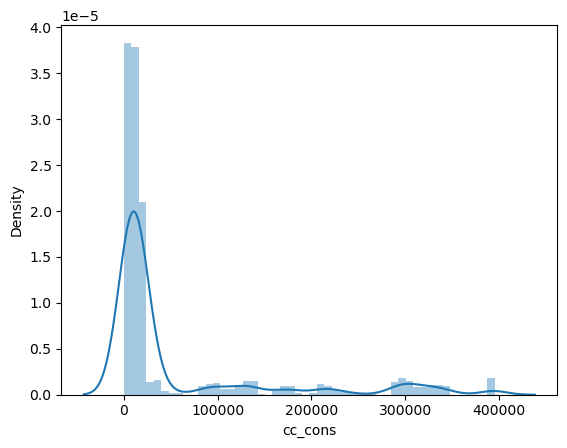

In [32]:
sns.distplot(DATA_CONT.cc_cons)

In [33]:
# From the above output, its clear that the y variable WHICH IS "cc_cons" is NOT NORMALLY DISTRIBUTED. Hence, we need to do transformations of the data.
# AS THIS VIOLETS THE ASSUMPTIONS OF LINEAR REGRESSION

C:\Users\Admin\AppData\Local\Temp\ipykernel_3688\3312426984.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ln_cc_cons)


<Axes: xlabel='cc_cons', ylabel='Density'>

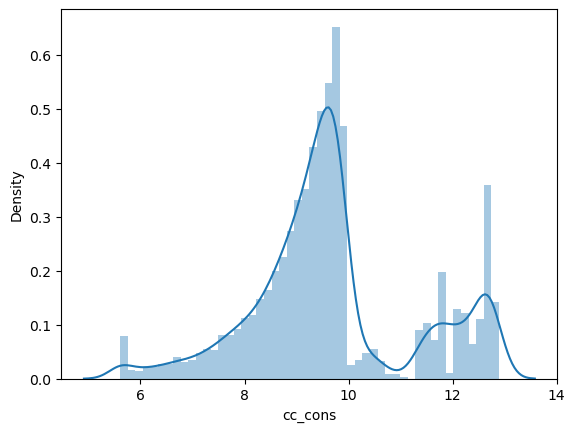

In [34]:
ln_cc_cons=np.log(DATA_CONT.cc_cons)
sns.distplot(ln_cc_cons)

In [35]:
ln_cc_cons.skew()

0.27319079406367175

In [36]:
DATA_CONT['ln_cc_cons'] = np.log(DATA_CONT.cc_cons)

In [37]:
DATA_CONT.head(2)

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,ln_cc_cons
111,12554.0,35,15.0,1,708.0,0,17.0,24893.00,378.0,10288.0,...,40,24563.0,30051.32,12761.0,2,65,50836.0,1674.09,20014.0,9.904187
112,17645.0,35,15.0,6,233.0,0,14.0,18941.62,966.0,20672.0,...,78,23948.0,42119.05,76206.0,21,63,23226.0,13043.34,10173.0,9.227492


In [38]:
# CATEGORICAL DATA
DATA_CAT

,account_type,gender,Income,loan_enq
111,current,M,MEDIUM,Y
112,current,M,HIGH,Y
113,current,M,MEDIUM,Y
114,current,F,MEDIUM,Y
115,current,M,MEDIUM,NaN
...,...,...,...,...
15106,current,F,LOW,Y
15107,current,M,MEDIUM,Y
15108,current,M,MEDIUM,Y
15109,current,M,MEDIUM,Y


In [39]:
DATA_CAT.nunique()

account_type    2
gender          2
Income          3
loan_enq        1
dtype: int64

In [40]:
DATA_CAT = pd.get_dummies(DATA_CAT.loc[: : ,[ 'account_type', 'Income','gender']], 
                             drop_first = True)
DATA_CAT

,account_type_saving,Income_LOW,Income_MEDIUM,gender_M
111,False,False,True,True
112,False,False,False,True
113,False,False,True,True
114,False,False,True,False
115,False,False,True,True
...,...,...,...,...
15106,False,True,False,False
15107,False,False,True,True
15108,False,False,True,True
15109,False,False,True,True


In [41]:
# COMBINE THE CONTINUOUS AND CATEGORICAL DATA
DATA0 = pd.concat([DATA_CONT,DATA_CAT],axis=1)

In [42]:
DATA0.head()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,ln_cc_cons,account_type_saving,Income_LOW,Income_MEDIUM,gender_M
111,12554.0,35,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,...,2,65,50836.0,1674.09,20014.0,9.904187,False,False,True,True
112,17645.0,35,15.0,6,233.0,0,14.0,18941.62,966.00,20672.00,...,21,63,23226.0,13043.34,10173.0,9.227492,False,False,False,True
113,7604.0,55,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,...,7,1,27036.0,25375.27,16095.0,9.686264,False,False,True,True
114,1590.0,29,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,...,21,83,43037.0,3544.33,7707.0,8.949884,False,False,True,False
115,16556.0,34,12.6,4,802.0,1,7.0,7441.40,6906.04,4364.00,...,8,32,32044.0,12780.44,96408.0,11.476344,False,False,True,True


In [43]:
# ASSIGNING TARGET AND FEATURE VALUES
X = DATA0.drop(['cc_cons','ln_cc_cons'], axis=1)  # Features
y = DATA0[['cc_cons','ln_cc_cons'] ] # Target variable

In [44]:
X

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,Income_LOW,Income_MEDIUM,gender_M
111,12554.0,35,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,...,30051.32,12761.00,2,65,50836.00,1674.09,False,False,True,True
112,17645.0,35,15.0,6,233.0,0,14.0,18941.62,966.00,20672.00,...,42119.05,76206.00,21,63,23226.00,13043.34,False,False,False,True
113,7604.0,55,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,...,58373.25,75283.00,7,1,27036.00,25375.27,False,False,True,True
114,1590.0,29,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,...,69851.51,68708.00,21,83,43037.00,3544.33,False,False,True,False
115,16556.0,34,12.6,4,802.0,1,7.0,7441.40,6906.04,4364.00,...,10071.00,80140.00,8,32,32044.00,12780.44,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,6995.0,53,13.2,9,653.0,1,20.0,10443.76,1218.85,7252.24,...,487751.19,42625.50,14,8,82851.00,78966.76,False,True,False,False
15107,10376.0,44,2.4,9,535.0,1,2.0,29890.33,6308.00,16025.50,...,8666.01,34987.55,11,18,118110.47,4762.10,False,False,True,True
15108,2181.0,37,3.4,9,464.0,1,8.0,4148.98,948.74,19360.26,...,97896.48,261432.00,4,73,49545.00,2877.33,False,False,True,True
15109,18417.0,220,40.0,10,536.0,1,3.0,115574.00,7191.05,44341.13,...,22693.92,33025.29,3,80,16130.00,13006.84,False,False,True,True


In [45]:
y

,cc_cons,ln_cc_cons
111,20014.00,9.904187
112,10173.00,9.227492
113,16095.00,9.686264
114,7707.00,8.949884
115,96408.00,11.476344
...,...,...
15106,4263.00,8.357728
15107,11019.00,9.307376
15108,395290.55,12.887376
15109,28813.00,10.268582


In [46]:
# SPLITTING THE DATA INTO TRAINING AND TESTING IN THE RATIO 7:3 i.e. 70% TRAINING DATA AND 30% TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [47]:
X_train

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,Income_LOW,Income_MEDIUM,gender_M
13238,12495.0,37,11.9,2,863.0,1,13.0,19177.42,608.00,18494.190,...,52488.6900,31229.00,3,103,251.00,1867.99,False,False,True,True
3032,12763.0,42,11.0,2,864.0,1,14.0,4955.04,13247.96,1593.120,...,126315.6300,62442.00,6,106,48727.00,26458.50,False,False,True,True
4691,18212.0,69,9.8,6,748.0,1,4.0,5620.31,3456.75,2371.000,...,18430.7700,46782.00,6,63,126970.00,707.37,False,True,False,True
2268,2658.0,37,15.3,3,809.0,1,15.0,1429.20,373.00,9409.095,...,25854.6700,42917.79,6,3,99755.00,11084.29,True,True,False,True
4360,17444.0,27,3.5,10,354.0,1,9.0,3854.76,3604.00,8884.320,...,517933.0297,54981.46,1,32,32473.00,2500.85,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,5683.0,53,19.8,8,366.0,1,13.0,2428.81,11894.00,8839.500,...,85296.5300,39067.78,18,11,34380.00,1432.85,False,True,False,True
10028,1265.0,60,32.0,4,330.0,0,20.0,4957.09,5628.21,1585.000,...,19244.6700,227095.00,3,3,14525.00,9300.87,True,False,True,True
4190,7474.0,51,9.3,1,424.0,0,4.0,11214.92,39739.00,1922.750,...,56913.5000,29714.00,14,58,28485.00,3778.61,False,False,True,True
2365,12886.0,55,7.0,4,374.0,1,17.0,1854.00,15759.00,17794.530,...,128265.5300,14633.25,7,27,113745.00,5224.41,True,False,True,True


In [48]:
X_test

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,Income_LOW,Income_MEDIUM,gender_M
10755,4888.0,37,11.9,6,737.0,0,2.0,5522.38,4844.00,21387.49,...,93292.63,111562.00,3,12,16966.0,43017.62,False,True,False,True
14062,16263.0,33,13.0,1,686.0,1,19.0,11925.20,3370.29,12180.83,...,66789.37,66918.00,12,32,22729.0,18242.25,False,True,False,True
8193,6016.0,51,27.9,8,574.0,1,6.0,16697.00,3612.68,111653.01,...,77809.28,10293.00,38,36,45556.0,940.72,False,True,False,True
10395,3871.0,47,27.0,10,486.0,1,16.0,1271.87,7223.00,7564.41,...,37285.44,77341.00,12,7,75889.0,719.37,True,False,False,True
13584,18798.0,37,17.0,9,626.0,0,10.0,26971.37,3079.55,7178.50,...,54150.33,88783.00,7,120,57122.0,10900.95,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1779.0,62,33.6,10,554.0,1,18.0,3530.00,2785.00,2522.00,...,55567.64,253968.00,5,83,14295.0,3107.35,False,False,True,True
5832,16757.0,56,10.8,1,519.0,1,16.0,3913.36,1370.00,5079.04,...,81903.06,742.00,49,17,46650.0,998.22,False,False,True,True
13685,4951.0,47,2.7,7,928.0,0,3.0,43229.23,6274.01,4658.52,...,71112.91,44873.00,21,7,53900.0,15092.70,False,False,True,True
1314,8455.0,34,7.0,3,454.0,0,14.0,30603.54,3836.17,10554.87,...,64572.43,541767.03,4,39,34668.0,3863.52,False,False,True,True


In [49]:
y_train

,cc_cons,ln_cc_cons
13238,6530.0,8.784162
3032,5455.0,8.604288
4691,22442.0,10.018689
2268,9662.0,9.175956
4360,12567.0,9.438830
...,...,...
3157,1501.0,7.313887
10028,540.0,6.291569
4190,5979.0,8.696009
2365,13863.0,9.536979


In [50]:
y_test

,cc_cons,ln_cc_cons
10755,271.99,5.605765
14062,271.99,5.605765
8193,13707.00,9.525662
10395,9840.00,9.194211
13584,116210.00,11.663154
...,...,...
638,19876.00,9.897268
5832,18047.00,9.800735
13685,292081.00,12.584786
1314,4944.00,8.505930


In [51]:
# NOW USING DECISION TREE
regressor = DecisionTreeRegressor()
regressor

DecisionTreeRegressor()

In [52]:
# MAKING THE DECISION TREE ON TRAINING DATA
regressor = regressor.fit(X_train, y_train)
regressor

DecisionTreeRegressor()

In [53]:
feature_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False)

cc_cons_apr                     0.043100
cc_cons_may                     0.035387
debit_amount_may                0.034927
investment_4                    0.034827
debit_amount_jun                0.033569
emi_active                      0.032898
max_credit_amount_jun           0.031911
credit_amount_apr               0.031865
credit_amount_may               0.031029
card_lim                        0.030663
investment_3                    0.030656
ID                              0.029979
dc_cons_apr                     0.029211
debit_amount_apr                0.029071
cc_cons_jun                     0.028677
Emp_Tenure_Years                0.028677
investment_1                    0.028396
investment_2                    0.028129
debit_count_may                 0.027578
dc_cons_may                     0.027442
credit_amount_jun               0.026363
region_code                     0.025933
credit_count_jun                0.023967
max_credit_amount_apr           0.023809
debit_count_jun 

In [54]:
feature_importances=pd.DataFrame(feature_importances)
feature_importances.columns=['score']
feature_importances

,score
ID,0.029979
age,0.017876
Emp_Tenure_Years,0.028677
Tenure_with_Bank,0.012164
region_code,0.025933
NetBanking_Flag,0.001383
Avg_days_between_transaction,0.018753
cc_cons_apr,0.043100
dc_cons_apr,0.029211
cc_cons_may,0.035387


In [55]:
impt_features=feature_importances.index[feature_importances.score>0.015]

In [56]:
X=DATA0[impt_features]
X

,ID,age,Emp_Tenure_Years,region_code,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
111,12554.0,35,15.0,708.0,17.0,24893.00,378.00,10288.00,29664.00,16291.40,...,191777.13,2,40,24563.0,30051.32,12761.00,2,65,50836.00,1674.09
112,17645.0,35,15.0,233.0,14.0,18941.62,966.00,20672.00,287.00,4217.00,...,71162.00,2,78,23948.0,42119.05,76206.00,21,63,23226.00,13043.34
113,7604.0,55,24.5,802.0,3.0,5678.87,2724.00,1964.50,3933.11,23956.25,...,70978.00,2,82,10752.0,58373.25,75283.00,7,1,27036.00,25375.27
114,1590.0,29,4.5,867.0,4.0,30489.50,1236.00,12609.88,9138.14,17521.00,...,63033.84,23,38,12607.0,69851.51,68708.00,21,83,43037.00,3544.33
115,16556.0,34,12.6,802.0,7.0,7441.40,6906.04,4364.00,1939.00,2121.00,...,30286.00,24,50,25213.0,10071.00,80140.00,8,32,32044.00,12780.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,6995.0,53,13.2,653.0,20.0,10443.76,1218.85,7252.24,3873.00,6633.00,...,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,78966.76
15107,10376.0,44,2.4,535.0,2.0,29890.33,6308.00,16025.50,7610.00,2213.08,...,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,4762.10
15108,2181.0,37,3.4,464.0,8.0,4148.98,948.74,19360.26,494.00,44363.91,...,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,2877.33
15109,18417.0,220,40.0,536.0,3.0,115574.00,7191.05,44341.13,34817.20,20679.00,...,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,13006.84


In [57]:
y=DATA0[['cc_cons','ln_cc_cons']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [59]:
model = LinearRegression()
model

LinearRegression()

In [60]:
fm=model.fit(X_train,y_train)
fm

LinearRegression()

In [61]:
y_pred = model.predict(X_test)

In [62]:
metrics.mean_absolute_error(y_test, y_pred)

34844.59398232026

In [63]:
metrics.mean_squared_error(y_test, y_pred)

4674558013.621704

In [65]:
# ROOT MEAN SQUARED ERROR
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

68370.7394549869

In [66]:
metrics.r2_score(y_test, y_pred)

-0.00030052658847767866